In [67]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
np.random.seed(42)
def plot(img):
    rgb =cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.imshow(rgb)

### Create Bounding Box(x,y,w,h) Randomly and Score(Confident correspoding)
* Assume we have 20 BoundingBox denoted just one sample (1 class) with score(Confident,x,y,w,h) mean while x,y is constant value
* We draw it on black image(to Visualization) Easier to see and observation
* Image with width = 500, height = 300, w and h bounding box is constant  = 80,60

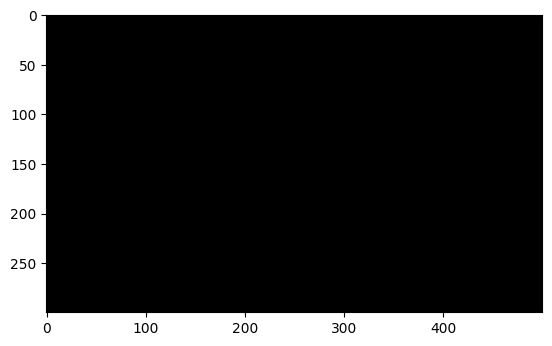

In [68]:
mask = np.zeros((300, 500), dtype = np.uint8)
plot(mask)

In [211]:
start_point_x = 180; offset_x = 30
start_point_y = 120; offset_y = 25
w = 100; h = 75

NUM_SAMPLE = 40
np.random.seed(42)

x1 = np.random.randint(start_point_x, start_point_x + offset_x ,NUM_SAMPLE)
y1 = np.random.randint(start_point_y, start_point_y + offset_y ,NUM_SAMPLE)

scores =  np.random.uniform(0.5, 1,NUM_SAMPLE)
indicating_max_scores = np.argsort(scores)[0]
print(f'Indication with maximun score: {indicating_max_scores}')
x2 = x1 + w; y2 = y1 + h

boxes = np.column_stack((x1, y1, x2, y2))
boxes[0]

Indication with maximun score: 24


array([186, 129, 286, 204])

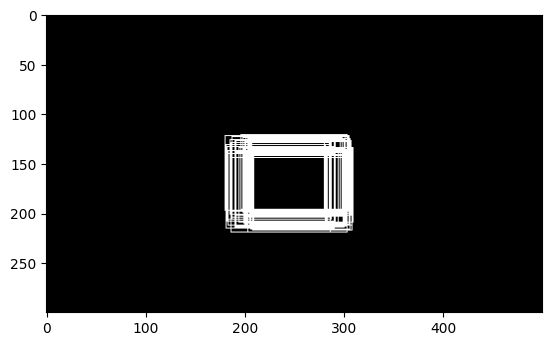

In [213]:
mask_clone  = mask.copy()
for x1,y1,x2,y2 in boxes:
    cv2.rectangle(mask_clone, (x1,y1), (x2,y2), color=(255, 255, 255), thickness= 1)

plot(mask_clone)

### IOU Foudational

In [214]:
boxes[0];boxes[1]

array([199, 135, 299, 210])

In [242]:
def IOU(box1, box2): # Make Calculation in Numpy

    x1,y1,x2,y2 = box1
    x3,y3,x4,y4 = box1

    box1 = box1.reshape(1,4)
    box2 = box2.reshape(1,4)

    x_a = np.maximum(box1[:, 0], box2[:, 0]) # x_a 
    y_a = np.maximum(box1[:, 1], box2[:, 1]) # y_a 
    x_b = np.minimum(box1[:, 2], box2[:, 2]) # x_b 
    y_b = np.minimum(box1[:, 3], box2[:, 3]) # y_b 


    area_intersect = np.absolute(x_a - x_b + 1) * np.absolute(y_a - y_b+ 1)
    area_union = np.absolute(x1 - x2 + 1) * np.absolute(y1 - y2 + 1) + np.absolute(x3 - x4 + 1) * np.absolute(y3 - y4 + 1) - area_intersect

    return (area_intersect / area_union) [0]

print(IOU(boxes[3],boxes[22]))
print(IOU(boxes[3],boxes[4]))
print(IOU(boxes[30],boxes[22]))

0.6642435256701499
0.83104223944014
0.5988651243998254


In [218]:
print(boxes[0])

[186 129 286 204]


In [250]:
len(boxes)

40

### Apply Non-max-Suppression Algorithm to find out Bounding with maximum score and IOU is unique

In [270]:
def non_max_suppression(boxes, scores, threshold):
    """
    Perform non-maximum suppression.

    Parameters:
    boxes (numpy.ndarray): Array of bounding boxes, each defined by [x1, y1, x2, y2].
    scores (numpy.ndarray): Array of confidence scores for each bounding box.
    threshold (float): Overlap threshold for suppression.

    Returns:
    numpy.ndarray: Indices of bounding boxes to keep.
    """
    if len(boxes) == 0:
        return []

    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)

    # Sort by scores
    order = scores.argsort()[::-1]
    print(f'order scores: \n{order}')
    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)

        # Compute IoU (Intersection over Union)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])
        
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        intersection = w * h
        iou = intersection / (areas[i] + areas[order[1:]] - intersection)

        # Suppress bounding boxes with IoU over the threshold
        inds = np.where(iou <= threshold)[0]
        order = order[inds + 1]

    return keep

In [271]:
keep_indices = non_max_suppression(boxes, scores, 0.4)
kept_boxes = boxes[keep_indices]

print("Indices of boxes to keep:", keep_indices)
print("Boxes to keep:")
print(kept_boxes)

order scores: 
[21  2  4  7  5 32 14 25 19  3 22 28 38 27 26 39 33  6  0 17 12 30 15 34
 11 37 36 16 13 23  9  1 18 31  8 20 29 35 10 24]
Indices of boxes to keep: [21]
Boxes to keep:
[[200 128 300 203]]


### Redraw result after using Non-Max Suppression Algorithm

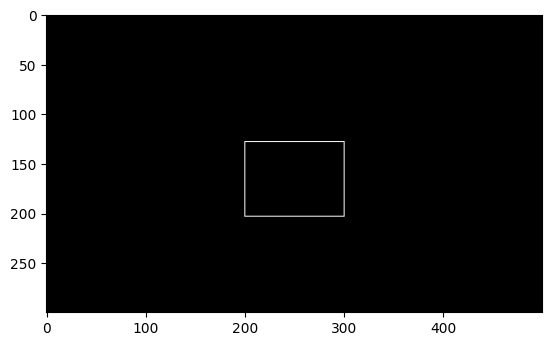

In [272]:
mask_clone  = mask.copy()
for x1,y1,x2,y2 in kept_boxes:
    cv2.rectangle(mask_clone, (x1,y1), (x2,y2), color=(255, 255, 255), thickness= 1)

plot(mask_clone)